<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Parcial2/Tierra_plana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Campo gravitacional calculado en (0, 0, 0.2): -9.813647
El resultado es correcto.


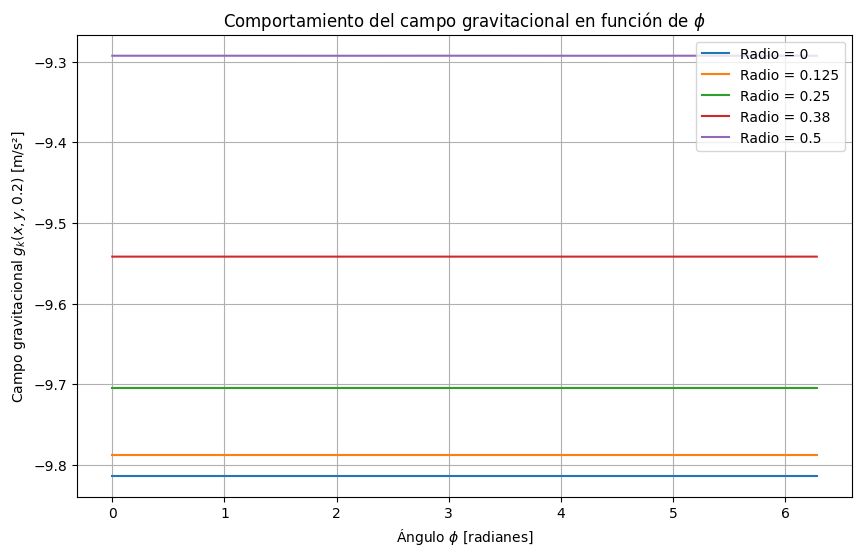

Campo gravitacional promedio en R = 0.5: -9.292626 m/s²
Campo gravitacional promedio en R = 1.0: -4.675164 m/s²


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# a)
puntos_r, pesos_r= np.polynomial.legendre.leggauss(50)

# b)
def integrando_gravedad(z, r, theta, pos):
    """Evalúa el integrando de la ecuación gravitacional."""
    x, y = pos
    distancia_cuad = x**2 + y**2 + z**2 - 2 * r * (x * np.cos(theta) + y * np.sin(theta)) + r**2
    return (z * r) / np.power(distancia_cuad, 1.5)

# c)
def calcular_campo_gravitacional(pos, z, n_puntos):


    constante = -1.9429303960


    r_vals = 0.5 * (puntos_r + 1)
    theta_vals = np.pi * (puntos_r + 1)


    pesos_r_scaled = 0.5 * pesos_r
    pesos_theta_scaled = np.pi * pesos_r

    resultado = 0.0

    for i in range(n_puntos):
        for j in range(n_puntos):
            r_i = r_vals[i]
            theta_j = theta_vals[j]
            peso_total = pesos_r_scaled[i] * pesos_theta_scaled[j]
            resultado += peso_total * integrando_gravedad(z, r_i, theta_j, pos)

    return constante * resultado

# d)
def verificar_campo(z_valor, esperado):
    """Verifica que el campo gravitacional en el origen coincide con el valor esperado."""
    campo = calcular_campo_gravitacional((0, 0), z_valor, 50)
    print(f"Campo gravitacional calculado en (0, 0, {z_valor}): {campo:.6f}")
    if np.isclose(campo, esperado, atol=1e-6):
        print("El resultado es correcto.")
    else:
        print("El resultado no coincide con el esperado.")


g_esperado = -9.813646
verificar_campo(0.2, g_esperado)

# e)
def calcular_campo_por_radio(radios, n_angular):
    """Calcula el campo gravitacional para diferentes radios y ángulos."""
    angulos = np.linspace(0, 2 * np.pi, n_angular)
    resultados = {}

    for r in radios:
        valores_campo = []
        for phi in angulos:
            x_r = r * np.cos(phi)
            y_r = r * np.sin(phi)
            g_campo = calcular_campo_gravitacional((x_r, y_r), 0.2, 50)
            valores_campo.append(g_campo)
        resultados[r] = valores_campo

    return angulos, resultados


radios = [0, 0.125, 0.25, 0.38, 0.5]
n_angulos = 10
angulos_phi, campos_azimutales = calcular_campo_por_radio(radios, n_angulos)

def graficar_resultados(angulos, resultados_campo):
    """Genera una gráfica del comportamiento del campo en función del ángulo."""
    plt.figure(figsize=(10, 6))

    for radio, campos in resultados_campo.items():
        plt.plot(angulos, campos, label=f'Radio = {radio}')

    plt.title('Comportamiento del campo gravitacional en función de $\\phi$')
    plt.xlabel('Ángulo $\\phi$ [radianes]')
    plt.ylabel('Campo gravitacional $g_k(x, y, 0.2)$ [m/s²]')
    plt.legend()
    plt.grid(True)
    plt.show()
graficar_resultados(angulos_phi, campos_azimutales)

#(g)
radios_interes = [0.5, 1.0]
angulos_phi, campos_en_radios = calcular_campo_por_radio(radios_interes, n_angulos)
for radio in radios_interes:
    print(f"Campo gravitacional promedio en R = {radio}: {np.mean(campos_en_radios[radio]):.6f} m/s²")


f)El hecho de que la gravedad no dependa del ángulo φ sobre la Tierra implica que el campo gravitacional en este modelo es isotrópico en las direcciones azimutales, es decir, es el mismo en cualquier dirección desde un punto específico en la superficie del disco (Tierra). Esto es consistente con lo que esperaríamos de un objeto que tiene una distribución de masa simétrica. Dado que la Tierra es modelada como un disco de densidad uniforme, la simetría circular hace que la gravedad sea igual en cualquier dirección alrededor de un punto dado, independientemente del ángulo.

h)a un amigo terraplanista podria decirle que el modelo de tierra plana no se acopla a los resultados que se observan en la tierra, pues en el modelo esferico la gravedad es practicamente constante en el planeta (ligeros cambios entre el ecuador a los polos), no como los resultados calculados donde essta cambia de manera considerable.